### AFS Code

In [1]:
import numpy as np
import torch
from torch import nn
from torch import optim
from torch import Tensor
from torch import LongTensor
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import logging
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score
from inspect import signature

#from torchviz import make_dot

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
SEED = 67
torch.manual_seed(1)

In [6]:
logging.basicConfig(format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S')
logging.getLogger().setLevel(logging.INFO)

### Test with malware data (471 features)

In [7]:
FEATURES = ["zip","so","Landroid/os/SystemClock;->elapsedRealtime()J","Landroid/app/NotificationManager;->notify(ILandroid/app/Notification;)V","Landroid/webkit/WebChromeClient$CustomViewCallback;","Landroid/app/Notification;-><init>()V","Ldalvik/system/DexClassLoader","Landroid/app/Notification;->icon:I","Landroid/widget/ImageButton;->setBackgroundColor(I)V","Landroid/widget/RelativeLayout;->addView(Landroid/view/View;ILandroid/view/ViewGroup$LayoutParams;)V","Landroid/net/Uri$Builder;->appendPath(Ljava/lang/String;)Landroid/net/Uri$Builder;","Landroid/graphics/drawable/GradientDrawable;","Landroid/content/pm/PackageManager;->getPackageArchiveInfo(Ljava/lang/String;I)Landroid/content/pm/PackageInfo;","Landroid/view/animation/ScaleAnimation;->setDuration(J)V","Landroid/view/MotionEvent;->obtain(JJIFFFFIFFII)Landroid/view/MotionEvent;","Landroid/os/Parcel;->readList(Ljava/util/List;Ljava/lang/ClassLoader;)V","Landroid/os/Handler;->obtainMessage()Landroid/os/Message;","Landroid/webkit/WebResourceResponse;-><init>(Ljava/lang/String;Ljava/lang/String;Ljava/io/InputStream;)V","Landroid/view/animation/Animation;->initialize(IIII)V","Landroid/app/ActivityManager$RunningTaskInfo;->topActivity:Landroid/content/ComponentName;","Landroid/webkit/JsResult;->cancel()V","Landroid/widget/RemoteViews;-><init>(Ljava/lang/String;I)V","Landroid/app/AlarmManager;->set(IJLandroid/app/PendingIntent;)V","Landroid/util/AttributeSet;->getAttributeIntValue(Ljava/lang/String;Ljava/lang/String;I)I","Landroid/widget/MediaController;","Landroid/os/Message;-><init>()V","Landroid/webkit/ConsoleMessage;","Landroid/content/pm/ApplicationInfo;->enabled:Z","Landroid/webkit/WebView;->addJavascriptInterface(Ljava/lang/Object;Ljava/lang/String;)V","Landroid/view/MotionEvent;->recycle()V","Landroid/telephony/TelephonyManager;->getNetworkOperatorName()Ljava/lang/String;","Landroid/app/AlertDialog$Builder;->setOnCancelListener(Landroid/content/DialogInterface$OnCancelListener;)Landroid/app/AlertDialog$Builder;","Landroid/telephony/gsm/GsmCellLocation;","Landroid/app/AlarmManager;->setRepeating(IJJLandroid/app/PendingIntent;)V","Landroid/graphics/Camera;->save()V","Landroid/database/CursorWindow;->getString(II)Ljava/lang/String;","Landroid/webkit/ConsoleMessage$MessageLevel;->TIP:Landroid/webkit/ConsoleMessage$MessageLevel;","Landroid/graphics/drawable/GradientDrawable$Orientation;->TOP_BOTTOM:Landroid/graphics/drawable/GradientDrawable$Orientation;","Landroid/widget/Gallery$LayoutParams;-><init>(II)V","Landroid/content/Context;->bindService(Landroid/content/Intent;Landroid/content/ServiceConnection;I)Z","Landroid/os/Parcel;->writeTypedList(Ljava/util/List;)V","Landroid/net/Uri;->getScheme()Ljava/lang/String;","Landroid/os/Bundle;->getParcelable(Ljava/lang/String;)Landroid/os/Parcelable;","Landroid/content/Context;->getClassLoader()Ljava/lang/ClassLoader;","Landroid/widget/TextView;->setLineSpacing(FF)V","Landroid/webkit/WebView;->setDownloadListener(Landroid/webkit/DownloadListener;)V","Landroid/widget/ProgressBar;-><init>(Landroid/content/Context;)V","Landroid/content/res/Resources$NotFoundException; {:try_start_0 .. :try_end_0} :catch_0","Landroid/widget/ImageView;->setId(I)V","Landroid/webkit/WebChromeClient;->onJsAlert(Landroid/webkit/WebView;Ljava/lang/String;Ljava/lang/String;Landroid/webkit/JsResult;)Z","Landroid/provider/Browser;->BOOKMARKS_URI:Landroid/net/Uri;","Landroid/app/NotificationManager;->cancel(I)V","Landroid/content/Context;->getFilesDir()Ljava/io/File;","Landroid/webkit/WebChromeClient;->onRequestFocus(Landroid/webkit/WebView;)V","Landroid/view/animation/AlphaAnimation;->startNow()V","Landroid/os/Parcel;->createStringArray()","a/a;","Landroid/os/Parcel;->writeNoException()V","Landroid/database/CursorWindow;->getInt(II)I","Landroid/app/ActivityManager;->getRunningTasks(I)Ljava/util/List;","Landroid/support/v4/app/Fragment;->onDestroy()V","Landroid/content/Context;->unbindService(Landroid/content/ServiceConnection;)V","Landroid/graphics/Color;->rgb(III)I","Landroid/content/res/Resources;->getValue(Ljava/lang/String;Landroid/util/TypedValue;Z)V","Landroid/widget/MediaController;-><init>(Landroid/content/Context;)V","Landroid/annotation/SuppressLint;","Landroid/webkit/JsPromptResult;->confirm(Ljava/lang/String;)V","Landroid/content/res/TypedArray;->recycle()V","Landroid/content/pm/ActivityInfo;->configChanges:I","Landroid/util/TypedValue;->string:Ljava/lang/CharSequence;","Landroid/app/Activity;->getIntent()Landroid/content/Intent;","Landroid/telephony/TelephonyManager;->getSimOperator()Ljava/lang/String;","Landroid/net/Uri$Builder;->appendQueryParameter(Ljava/lang/String;Ljava/lang/String;)Landroid/net/Uri$Builder;","Landroid/widget/RelativeLayout;->onKeyDown(ILandroid/view/KeyEvent;)Z","Landroid/webkit/WebView;->clearCache(Z)V","Landroid/webkit/WebSettings;->setDisplayZoomControls(Z)V","Landroid/support/v4/app/Fragment;->onCreate(Landroid/os/Bundle;)V","Landroid/os/Parcel;->readDouble()D","Landroid/app/Activity;->onKeyDown(ILandroid/view/KeyEvent;)Z","Landroid/content/Intent;->setClass(Landroid/content/Context;Ljava/lang/Class;)Landroid/content/Intent;","Landroid/webkit/ConsoleMessage$MessageLevel;->WARNING:Landroid/webkit/ConsoleMessage$MessageLevel;","Landroid/view/ViewGroup;->removeAllViews()V","Landroid/telephony/SmsManager;->sendTextMessage(Ljava/lang/String;Ljava/lang/String;Ljava/lang/String;Landroid/app/PendingIntent;Landroid/app/PendingIntent;)V","Landroid/telephony/TelephonyManager;->getCellLocation()Landroid/telephony/CellLocation;","Landroid/webkit/WebSettings;->setDatabasePath(Ljava/lang/String;)V","Landroid/view/animation/ScaleAnimation;-><init>(FFFFFF)V","Landroid/app/Notification;->setLatestEventInfo(Landroid/content/Context;Ljava/lang/CharSequence;Ljava/lang/CharSequence;Landroid/app/PendingIntent;)V","Landroid/net/Proxy;->getDefaultHost()Ljava/lang/String;","Landroid/net/NetworkInfo;->getExtraInfo()Ljava/lang/String;","Landroid/webkit/WebChromeClient;->onConsoleMessage(Landroid/webkit/ConsoleMessage;)Z","Landroid/os/IInterface;","Landroid/view/animation/TranslateAnimation;-><init>(IFIFIFIF)V","Landroid/support/v4/app/FragmentActivity;","Ljava/lang/Runtime;->exec","Landroid/net/NetworkInfo$State;->CONNECTED:Landroid/net/NetworkInfo$State;","Landroid/webkit/ConsoleMessage;->messageLevel()Landroid/webkit/ConsoleMessage$MessageLevel;","Landroid/telephony/TelephonyManager;","Landroid/widget/VideoView;->setOnCompletionListener(Landroid/media/MediaPlayer$OnCompletionListener;)V","Landroid/webkit/WebView;->enablePlatformNotifications()V","Landroid/app/PendingIntent;->getActivity(Landroid/content/Context;ILandroid/content/Intent;I)Landroid/app/PendingIntent;","application/vnd.android.package-archive","Landroid/webkit/ConsoleMessage;->sourceId()Ljava/lang/String;","Landroid/os/Bundle;->CREATOR:Landroid/os/Parcelable$Creator;","Landroid/os/ParcelFileDescriptor;->getFileDescriptor()Ljava/io/FileDescriptor;","Landroid/widget/VideoView;->seekTo(I)V","Landroid/graphics/Camera;->rotateY(F)V","Landroid/app/Notification;->defaults:I","Landroid/widget/RemoteViews;->setProgressBar(IIIZ)V","Landroid/os/Parcel;->createFloatArray()","Landroid/view/animation/AnimationSet;-><init>(Z)V","Landroid/os/ResultReceiver;","Landroid/net/NetworkInfo;->isAvailable()Z","Landroid/os/Bundle;->putParcelable(Ljava/lang/String;Landroid/os/Parcelable;)V","Landroid/net/Uri;->buildUpon()Landroid/net/Uri$Builder;","Landroid/graphics/Point;","Landroid/webkit/ConsoleMessage$MessageLevel;->ordinal()I","Landroid/telephony/SmsManager;->getDefault()Landroid/telephony/SmsManager;","Landroid/view/View$MeasureSpec;->getMode(I)I","Landroid/telephony/TelephonyManager;->getSimOperatorName()Ljava/lang/String;","Landroid/app/Service;->onCreate()V","Landroid/os/Bundle;->keySet()Ljava/util/Set;","Landroid/webkit/ConsoleMessage;->lineNumber()I","Landroid/graphics/Bitmap;->getRowBytes()I","Landroid/os/Bundle;->setClassLoader(Ljava/lang/ClassLoader;)V","Landroid/widget/VideoView;->setMediaController(Landroid/widget/MediaController;)V","Landroid/net/NetworkInfo;->getTypeName()Ljava/lang/String;","Landroid/app/Notification;->ledOnMS:I","Landroid/os/RemoteException; {:try_start_1 .. :try_end_1} :catch_0","Landroid/webkit/WebSettings;->setSavePassword(Z)V","Landroid/graphics/Camera;->translate(FFF)V","Landroid/support/v4/app/Fragment;->setArguments(Landroid/os/Bundle;)V","Landroid/app/AlertDialog$Builder;->setNegativeButton(ILandroid/content/DialogInterface$OnClickListener;)Landroid/app/AlertDialog$Builder;","Landroid/database/CursorWindow;->CREATOR:Landroid/os/Parcelable$Creator;","Landroid/widget/VideoView;->setOnPreparedListener(Landroid/media/MediaPlayer$OnPreparedListener;)V","Landroid/app/Activity;->getComponentName()Landroid/content/ComponentName;","Landroid/net/wifi/WifiInfo;->getMacAddress()Ljava/lang/String;","Landroid/content/pm/PackageInfo;->packageName:Ljava/lang/String;","Landroid/content/SharedPreferences;->getInt(Ljava/lang/String;I)I","Landroid/graphics/Point;->y:I","Landroid/view/MotionEvent;->obtain(Landroid/view/MotionEvent;)Landroid/view/MotionEvent;","Landroid/support/v4/app/Fragment;","Landroid/database/CursorWindow;->isNull(II)Z","Landroid/webkit/WebChromeClient$CustomViewCallback;->onCustomViewHidden()V","Landroid/widget/RelativeLayout;->getVisibility()I","Landroid/content/Intent;->hasExtra(Ljava/lang/String;)Z","Landroid/app/Notification;->ledOffMS:I","Landroid/app/Notification;->ledARGB:I","Landroid/telephony/gsm/GsmCellLocation;->getCid()I","Landroid/webkit/WebSettings;->setMediaPlaybackRequiresUserGesture(Z)V","Landroid/widget/RemoteViews;->setImageViewResource(II)V","Landroid/webkit/WebView;->setScrollBarStyle(I)V","Landroid/graphics/drawable/BitmapDrawable;-><init>(Landroid/content/res/Resources;Landroid/graphics/Bitmap;)V","Landroid/widget/TextView;->setTextSize(F)V","Landroid/app/Notification;->when:J","Landroid/telephony/gsm/GsmCellLocation;->getLac()I","Landroid/view/animation/AnimationSet;","Landroid/webkit/WebSettings;->setCacheMode(I)V","Landroid/widget/ViewFlipper;-><init>(Landroid/content/Context;)V","Landroid/os/Parcel;->recycle()V","Landroid/view/animation/AccelerateInterpolator;-><init>()V","Landroid/app/ActivityManager;->getRunningServices(I)Ljava/util/List;","Landroid/net/wifi/WifiManager;","Landroid/net/ConnectivityManager;->getNetworkInfo(I)Landroid/net/NetworkInfo;","Landroid/content/res/TypedArray;->getBoolean(IZ)Z","Landroid/media/MediaPlayer$OnErrorListener;","Landroid/net/Uri$Builder;","Landroid/net/Uri;->getQueryParameter(Ljava/lang/String;)Ljava/lang/String;","Landroid/widget/MediaController;->hide()V","Landroid/widget/VideoView;->pause()V","Landroid/app/Service;","Landroid/widget/RemoteViews;","Landroid/widget/VideoView;->setVideoPath(Ljava/lang/String;)V","Ljavax/crypto","Landroid/webkit/WebChromeClient;->onReceivedTitle(Landroid/webkit/WebView;Ljava/lang/String;)V","Landroid/telephony/cdma/CdmaCellLocation;","Landroid/location/Criteria;->setAccuracy(I)V","Landroid/view/animation/ScaleAnimation;","Landroid/widget/EditText;","Landroid/webkit/JsPromptResult;","Landroid/util/TypedValue;->applyDimension(IFLandroid/util/DisplayMetrics;)F","Landroid/os/Bundle;->putBundle(Ljava/lang/String;Landroid/os/Bundle;)V","Landroid/content/BroadcastReceiver;-><init>()V","Landroid/widget/LinearLayout;->addView(Landroid/view/View;Landroid/view/ViewGroup$LayoutParams;)V","Landroid/net/Uri$Builder;->build()Landroid/net/Uri;","Landroid/app/ActivityManager$RunningTaskInfo;","Landroid/content/res/TypedArray;->getFloat(IF)F","Landroid/widget/RelativeLayout;->setBackgroundResource(I)V","Landroid/widget/Button;->setTextSize(F)V","Landroid/view/ViewGroup;->removeView(Landroid/view/View;)V","Landroid/net/wifi/WifiManager;->isWifiEnabled()Z","Landroid/webkit/JsPromptResult;->cancel()V","Landroid/os/Parcel;->createDoubleArray()","Landroid/app/Notification;->tickerText:Ljava/lang/CharSequence;","Landroid/app/AlarmManager;","Landroid/graphics/Point;-><init>()V","Landroid/graphics/Canvas;->getClipBounds()Landroid/graphics/Rect;","Landroid/telephony/TelephonyManager;->getDeviceId()Ljava/lang/String;","Landroid/content/Intent$ShortcutIconResource;->fromContext(Landroid/content/Context;I)Landroid/content/Intent$ShortcutIconResource;","Landroid/webkit/WebChromeClient;->onProgressChanged(Landroid/webkit/WebView;I)V","Landroid/webkit/WebChromeClient;->onJsPrompt(Landroid/webkit/WebView;Ljava/lang/String;Ljava/lang/String;Ljava/lang/String;Landroid/webkit/JsPromptResult;)Z","Landroid/widget/ImageButton;->setPadding(IIII)V","Landroid/widget/VideoView;->stopPlayback()V","Landroid/os/Bundle;-><init>(Landroid/os/Bundle;)V","Landroid/widget/Button;->setPadding(IIII)V","Landroid/database/CursorWindow;->getNumRows()I","Landroid/widget/Gallery;","Landroid/view/View;->getViewTreeObserver()Landroid/view/ViewTreeObserver;","Landroid/os/Handler;->handleMessage(Landroid/os/Message;)V","WRITE_HISTORY_BOOKMARKS","EXPAND_STATUS_BAR","READ_SOCIAL_STREAM","WRITE_SOCIAL_STREAM","ACTION_MY_PACKAGE_REPLACED","ACTION_UNINSTALL_PACKAGE","ACTION_DEVICE_STORAGE_OK","ACTION_BATTERY_OKAY","MOUNT_FORMAT_FILESYSTEMS","ACTION_SHUTDOWN","ACTION_MEDIA_EJECT","ACTION_DOCK_EVENT","ACTION_CHOOSER","ACTION_PROVIDER_CHANGED","INSTALL_PACKAGES","ACCESS_WIFI_STATE","ACTION_CREATE_SHORTCUT","ACTION_PACKAGE_ADDED","ACTION_PACKAGE_CHANGED","SET_WALLPAPER","FLASHLIGHT","ACTION_BATTERY_LOW","SUBSCRIBED_FEEDS_WRITE","MODIFY_PHONE_STATE","SET_PROCESS_LIMIT","ACTION_QUICK_CLOCK","MANAGE_ACCOUNTS","SET_ALWAYS_FINISH","ACTION_TIMEZONE_CHANGED","ADD_VOICEMAIL","ACTION_MEDIA_CHECKING","BIND_NFC_SERVICE","ACTION_USER_BACKGROUND","GLOBAL_SEARCH","CHANGE_CONFIGURATION","BROADCAST_PACKAGE_REMOVED","GET_PACKAGE_SIZE","CHANGE_WIFI_STATE","ACTION_MANAGE_NETWORK_USAGE","ACTION_PACKAGE_VERIFIED","ACTION_EXTERNAL_APPLICATIONS_AVAILABLE","READ_SMS","CAPTURE_VIDEO_OUTPUT","CAPTURE_SECURE_VIDEO_OUTPUT","ACTION_OPEN_DOCUMENT_TREE","ACTION_DREAMING_STOPPED","SEND_SMS","BIND_APPWIDGET","UNINSTALL_SHORTCUT","MOUNT_UNMOUNT_FILESYSTEMS","ACCESS_COARSE_LOCATION","ACTION_SCREEN_OFF","ACTION_CALL_BUTTON","WRITE_USER_DICTIONARY","SET_WALLPAPER_HINTS","ACTION_RUN","CAMERA","BLUETOOTH_PRIVILEGED","RECEIVE_MMS","ACTION_MANAGE_PACKAGE_STORAGE","READ_LOGS","ACTION_PACKAGE_FULLY_REMOVED","ACTION_MAIN","READ_HISTORY_BOOKMARKS","BIND_VOICE_INTERACTION","INJECT_EVENTS","FACTORY_TEST","ACTION_CALL","READ_CONTACTS","SUBSCRIBED_FEEDS_READ","ACCESS_CHECKIN_PROPERTIES","SIGNAL_PERSISTENT_PROCESSES","BIND_INPUT_METHOD","WRITE_CONTACTS","BLUETOOTH_ADMIN","ACTION_MEDIA_BAD_REMOVAL","SET_ANIMATION_SCALE","WRITE_PROFILE","DUMP","ACTION_PACKAGE_INSTALL","ACTION_BOOT_COMPLETED","ACTION_EXTERNAL_APPLICATIONS_UNAVAILABLE","BIND_DEVICE_ADMIN","WRITE_SYNC_SETTINGS","ACTION_BATTERY_CHANGED","ACTION_SENDTO","USE_CREDENTIALS","ACTION_SET_WALLPAPER","BIND_PRINT_SERVICE","ACTION_REBOOT","GET_TOP_ACTIVITY_INFO","ACTION_VIEW","ACTION_PACKAGE_NEEDS_VERIFICATION","REORDER_TASKS","PROCESS_OUTGOING_CALLS","BIND_TV_INPUT","ACTION_MEDIA_SHARED","RECEIVE_SMS","ACTION_CONFIGURATION_CHANGED","ACTION_INSERT","ACCESS_MOCK_LOCATION","BROADCAST_WAP_PUSH","ACTION_DEFAULT","DIAGNOSTIC","ACTION_MEDIA_SCANNER_SCAN_FILE","ACTION_MANAGED_PROFILE_ADDED","INSTALL_SHORTCUT","NFC","TRANSMIT_IR","UPDATE_DEVICE_STATS","ACTION_USER_FOREGROUND","ACTION_PACKAGE_REPLACED","ACTION_MEDIA_BUTTON","ACTION_PACKAGE_FIRST_LAUNCH","MASTER_CLEAR","MANAGE_DOCUMENTS","ACTION_ASSIST","SET_TIME","ACCESS_SURFACE_FLINGER","BRICK","WRITE_CALL_LOG","ACTION_PICK","ACTION_DEVICE_STORAGE_LOW","MANAGE_APP_TOKENS","ACTION_POWER_USAGE_SUMMARY","GET_ACCOUNTS","ACTION_INPUT_METHOD_CHANGED","ACTION_TIME_CHANGED","ACTION_NEW_OUTGOING_CALL","READ_USER_DICTIONARY","DISABLE_KEYGUARD","READ_EXTERNAL_STORAGE","BIND_REMOTEVIEWS","AUTHENTICATE_ACCOUNTS","ACTION_MEDIA_SCANNER_FINISHED","ACTION_MEDIA_UNMOUNTABLE","BIND_DREAM_SERVICE","INTERNET","ACTION_GET_RESTRICTION_ENTRIES","BIND_VPN_SERVICE","CONTROL_LOCATION_UPDATES","VIBRATE","ACTION_CREATE_DOCUMENT","SET_TIME_ZONE","WRITE_SETTINGS","ACTION_GET_CONTENT","ACTION_MEDIA_REMOVED","ACTION_SYNC","BROADCAST_SMS","ACTION_WEB_SEARCH","ACTION_POWER_DISCONNECTED","BROADCAST_STICKY","FORCE_BACK","ACTION_MEDIA_NOFS","BLUETOOTH","INTERNAL_SYSTEM_WINDOW","SET_POINTER_SPEED","READ_CALL_LOG","ACTION_CLOSE_SYSTEM_DIALOGS","KILL_BACKGROUND_PROCESSES","ACTION_INSERT_OR_EDIT","ACCESS_LOCATION_EXTRA_COMMANDS","READ_VOICEMAIL","ACTION_UID_REMOVED","ACTION_UMS_DISCONNECTED","ACTION_SCREEN_ON","ACTION_GTALK_SERVICE_DISCONNECTED","CHANGE_WIFI_MULTICAST_STATE","ACTION_INSTALL_PACKAGE","BIND_ACCESSIBILITY_SERVICE","CLEAR_APP_USER_DATA","READ_CALENDAR","RECEIVE_WAP_PUSH","ACTION_ANSWER","CAPTURE_AUDIO_OUTPUT","READ_SYNC_SETTINGS","WRITE_GSERVICES","CALL_PRIVILEGED","ACTION_SEND_MULTIPLE","ACTION_HEADSET_PLUG","ACTION_SYSTEM_TUTORIAL","SEND_RESPOND_VIA_MESSAGE","WRITE_SECURE_SETTINGS","ACTION_PASTE","ACTION_UMS_CONNECTED","ACTION_SEARCH","ACTION_BUG_REPORT","DELETE_CACHE_FILES","ACTION_OPEN_DOCUMENT","WRITE_VOICEMAIL","SET_ORIENTATION","GET_TASKS","ACCESS_NETWORK_STATE","ACTION_PICK_ACTIVITY","STATUS_BAR","ACTION_ALL_APPS","DELETE_PACKAGES","CLEAR_APP_CACHE","ACTION_TIME_TICK","ACTION_DATE_CHANGED","SET_PREFERRED_APPLICATIONS","HARDWARE_TEST","ACTION_MEDIA_MOUNTED","ACTION_USER_PRESENT","READ_PHONE_STATE","SET_ACTIVITY_WATCHER","ACTION_DELETE","MEDIA_CONTENT_CONTROL","READ_SYNC_STATS","ACTION_FACTORY_TEST","ACCESS_FINE_LOCATION","SET_DEBUG_APP","ACTION_SEARCH_LONG_PRESS","CHANGE_COMPONENT_ENABLED_STATE","WAKE_LOCK","MODIFY_AUDIO_SETTINGS","CHANGE_NETWORK_STATE","SYSTEM_ALERT_WINDOW","WRITE_CALENDAR","INSTALL_LOCATION_PROVIDER","BATTERY_STATS","ACTION_USER_INITIALIZE","SET_ALARM","BODY_SENSORS","RESTART_PACKAGES","ACTION_MEDIA_SCANNER_STARTED","ACTION_PACKAGE_REMOVED","ACTION_ATTACH_DATA","ACTION_APPLICATION_RESTRICTIONS_CHANGED","ACCOUNT_MANAGER","WRITE_EXTERNAL_STORAGE","RECORD_AUDIO","ACTION_LOCALE_CHANGED","ACTION_GTALK_SERVICE_CONNECTED","READ_FRAME_BUFFER","ACTION_DREAMING_STARTED","ACTION_MANAGED_PROFILE_REMOVED","READ_PROFILE","BIND_TEXT_SERVICE","WRITE_SMS","ACTION_PACKAGE_DATA_CLEARED","PERSISTENT_ACTIVITY","BIND_NOTIFICATION_LISTENER_SERVICE","WRITE_APN_SETTINGS","ACTION_EDIT","ACTION_POWER_CONNECTED","DEVICE_POWER","ACTION_AIRPLANE_MODE_CHANGED","USE_SIP","RECEIVE_BOOT_COMPLETED","BIND_WALLPAPER","ACTION_MEDIA_UNMOUNTED","ACTION_DIAL","READ_INPUT_STATE","CALL_PHONE","ACTION_CAMERA_BUTTON","LOCATION_HARDWARE","ACTION_APP_ERROR","REBOOT","ACTION_WALLPAPER_CHANGED","ACTION_VOICE_COMMAND","ACTION_SEND","ACTION_PACKAGE_RESTARTED"]

In [8]:
pd.set_option('display.max_rows', None)

data_dir = '/content/drive/My Drive/RA - Pathak/Attn/ml/'
mal_test = pd.read_csv(data_dir + "mal-test.csv")
mal_train = pd.read_csv(data_dir + "mal-train.csv")
ben_test = pd.read_csv(data_dir + "ben-test.csv")
ben_train = pd.read_csv(data_dir + "ben-train.csv")



In [9]:
test_mal_labeled = mal_test.copy()
train_mal_labeled = mal_train.copy()
test_ben_labeled = ben_test.copy()
train_ben_labeled = ben_train.copy()

test_mal_labeled.insert(1, 'label', 1)
train_mal_labeled.insert(1, 'label', 1)
test_ben_labeled.insert(1, 'label', 0)
train_ben_labeled.insert(1, 'label', 0)


In [10]:
train_labeled_data = train_ben_labeled.append(train_mal_labeled)
training_data = train_labeled_data.loc[:,'zip':'ACTION_PACKAGE_RESTARTED'].to_numpy()
train_labels = train_labeled_data['label'].to_numpy()

In [11]:
test_labeled_data = test_ben_labeled.append(test_mal_labeled)
test_X = test_labeled_data.loc[:,'zip':'ACTION_PACKAGE_RESTARTED'].to_numpy()
test_Y = test_labeled_data['label'].to_numpy()

In [12]:
train_X, val_X, train_Y, val_Y = train_test_split(training_data, train_labels, test_size=0.1, shuffle=True, random_state=SEED)

In [13]:
print('train_X', len(train_X))
print('test_X', len(test_X))
print('val_X', len(val_X))


train_X 139320
test_X 17200
val_X 15480


In [14]:
test_X[0].shape

(471,)

In [15]:
test_Y[0]

0

## Bernoulli Naive Bayes

In [16]:
model = BernoulliNB()
model.fit(train_X,train_Y)
print(model)
# make predictions

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [17]:
expected = test_Y
predicted = model.predict(test_X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted, digits=4))
print(metrics.confusion_matrix(expected, predicted)) 

              precision    recall  f1-score   support

           0     0.8709    0.8757    0.8733     12900
           1     0.6209    0.6105    0.6156      4300

    accuracy                         0.8094     17200
   macro avg     0.7459    0.7431    0.7445     17200
weighted avg     0.8084    0.8094    0.8089     17200

[[11297  1603]
 [ 1675  2625]]


In [18]:
from sklearn.metrics import average_precision_score
score_Y = model.predict_proba(test_X)[:,1]
average_precision = average_precision_score(test_Y, score_Y)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.58


Area under graph 0.6845561764797676
-------------------------------------------------


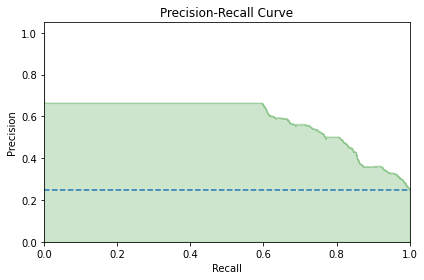

In [19]:
score_Y = model.predict_proba(test_X)[:,1]
truelabel = test_Y


precision, recall, _ = precision_recall_curve(truelabel,score_Y)
au = auc(recall, precision)
print("Area under graph "+str(au))
print("-------------------------------------------------")
positive_cases = sum(test_Y)/len(test_Y)
plt.plot([0, 1], [positive_cases, positive_cases], linestyle='--')

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
                if 'step' in signature(plt.fill_between).parameters
                else {})
plt.step(recall, precision, color='g', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.tight_layout()

## KNN

In [ ]:
Knnmodel = KNeighborsClassifier()
print(Knnmodel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
Knnmodel.fit(train_X,train_Y)
# make predictions
knnexpected = test_Y
knnpredicted = Knnmodel.predict(test_X)
# summarize the fit of the model
print(metrics.classification_report(knnexpected, knnpredicted, digits=4))
print(metrics.confusion_matrix(knnexpected, knnpredicted))

              precision    recall  f1-score   support

           0     0.9630    0.9697    0.9663     12900
           1     0.9071    0.8881    0.8975      4300

    accuracy                         0.9493     17200
   macro avg     0.9350    0.9289    0.9319     17200
weighted avg     0.9490    0.9493    0.9491     17200

[[12509   391]
 [  481  3819]]


In [ ]:
from sklearn.metrics import average_precision_score
score_Y = Knnmodel.predict_proba(test_X)[:,1]
average_precision = average_precision_score(test_Y, score_Y)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.92


Area under graph 0.9471528580044797
-------------------------------------------------


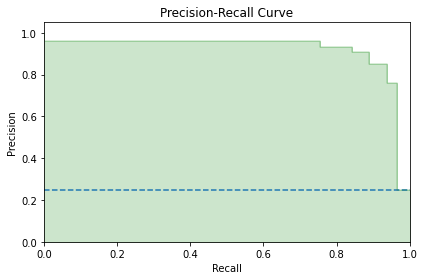

In [ ]:
score_Y = Knnmodel.predict_proba(test_X)[:,1]
truelabel = test_Y


precision, recall, _ = precision_recall_curve(truelabel,score_Y)
au = auc(recall, precision)
print("Area under graph "+str(au))
print("-------------------------------------------------")
positive_cases = sum(test_Y)/len(test_Y)
plt.plot([0, 1], [positive_cases, positive_cases], linestyle='--')

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
                if 'step' in signature(plt.fill_between).parameters
                else {})
plt.step(recall, precision, color='g', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.tight_layout()

## Support Vector Machine Classifier

In [20]:
svmmodel = SVC()
print(svmmodel)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [21]:
svmmodel.fit(train_X,train_Y)
# make predictions
svmexpected = test_Y
svmpredicted = svmmodel.predict(test_X)
# summarize the fit of the model
print(metrics.classification_report(svmexpected, svmpredicted, digits=4))
print(metrics.confusion_matrix(svmexpected, svmpredicted))

              precision    recall  f1-score   support

           0     0.9649    0.9717    0.9683     12900
           1     0.9133    0.8940    0.9035      4300

    accuracy                         0.9523     17200
   macro avg     0.9391    0.9328    0.9359     17200
weighted avg     0.9520    0.9523    0.9521     17200

[[12535   365]
 [  456  3844]]


In [22]:
score_Y = svmmodel.decision_function(test_X)
average_precision = average_precision_score(test_Y, score_Y)

print('Average precision-recall score: {0:0.4f}'.format(
      average_precision))

Average precision-recall score: 0.9545


Area under graph 0.9547859181947156
-------------------------------------------------


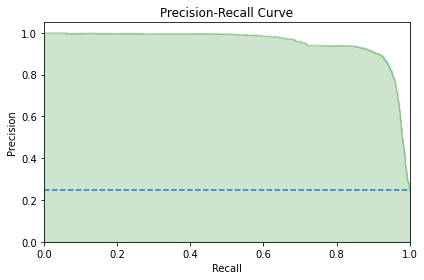

In [23]:
score_Y = svmmodel.decision_function(test_X)
truelabel = test_Y


precision, recall, _ = precision_recall_curve(truelabel,score_Y)
au = auc(recall, precision)
print("Area under graph "+str(au))
print("-------------------------------------------------")
positive_cases = sum(test_Y)/len(test_Y)
plt.plot([0, 1], [positive_cases, positive_cases], linestyle='--')

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
                if 'step' in signature(plt.fill_between).parameters
                else {})
plt.step(recall, precision, color='g', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.tight_layout()